# Introduction

There are several loads that act on the rigid bodies of the system. There are three gravitaional forces acting on the mass center of each body and there are three joint torques that act between each body causing rotation. Here we will specify vectors for each load and the points or reference frame they act on.

# Setup

Import the solutions from the last notebook:

In [1]:
from __future__ import print_function, division
from solution.inertia import *

Enable mathematical printing:

In [2]:
from sympy.physics.vector import init_vprinting

In [3]:
init_vprinting(use_latex=True)

Images!

In [4]:
from IPython.display import Image

# Gravity

First we need a gravitaional constant.

In [5]:
g = symbols('g')

Forces are bound vectors, i.e. they act on a point. We need a force with a magnitude $mg$ acting in the negative $y$ direction of the inertial reference frame.

In [6]:
lower_leg_grav_force_vector = -lower_leg_mass * g * inertial_frame.y
lower_leg_grav_force_vector

Now we make a tuple to represent the bound vector acting on the mass center of the lower leg.

In [7]:
lower_leg_grav_force = (lower_leg_mass_center, lower_leg_grav_force_vector)

Note that the bound force vector is compromised of a Point and a Vector.

In [8]:
type(lower_leg_mass_center)

sympy.physics.vector.point.Point

In [9]:
type(lower_leg_grav_force_vector)

sympy.physics.vector.vector.Vector

The same is done for the upper leg and torso.

In [10]:
upper_leg_grav_force = (upper_leg_mass_center, -upper_leg_mass * g * inertial_frame.y)
torso_grav_force = (torso_mass_center, -torso_mass * g * inertial_frame.y)

# Joint Torques

Joint torques can be used to simpilfy the effect that muscles have on making body segments move relative to each other. We need to specify three torque vectors which represent the total torque acting on each rigid body. First, specify three time varying variables to represent the magnitude of the joint torques: $T_a$, $T_k$, and $T_h$.

In [11]:
ankle_torque, knee_torque, hip_torque = dynamicsymbols('T_a, T_k, T_h')

Similar to the bound force vectors we must specify a reference frame and a vector of all the torques acting on that reference frame (rigid body). The external torques acting on the lower leg can be represented as a vector combining the ankle and knee torque contributions. Don't forget [Newton's third law of motion](https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion#Newton.27s_3rd_Law) (i.e. equal and oposite forces).

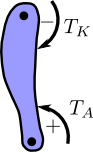

In [12]:
Image('figures/lower_leg_torque.png')

In [13]:
lower_leg_torque_vector = ankle_torque * inertial_frame.z - knee_torque * inertial_frame.z
lower_leg_torque_vector

Now store the lower leg's reference frame and the torque vector in a tuple for later use.

In [14]:
lower_leg_torque = (lower_leg_frame, lower_leg_torque_vector)

Again, we do the same for the upper leg and torso.

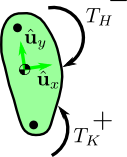

In [15]:
Image('figures/upper_leg_torque.png')

In [16]:
upper_leg_torque = (upper_leg_frame, knee_torque * inertial_frame.z - hip_torque * inertial_frame.z)

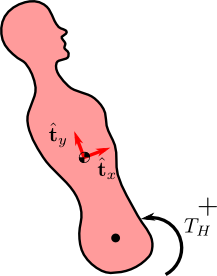

In [17]:
Image('figures/torso_torque.png')

In [18]:
torso_torque = (torso_frame, hip_torque * inertial_frame.z)